# Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API; a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

We will start by covering data representation in Scikit-Learn, followed by covering the Estimator API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

## Data Representation in Scikit-Learn
Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer. The best way to think about data within Scikit-Learn is in terms of tables of data.

### Data as table
A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. For example, consider the Iris dataset, famously analyzed by Ronald Fisher in 1936. We can download this dataset in the form of a Pandas DataFrame using the seaborn library:

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

import matplotlib.pyplot as plt

Columns of a matrix = features

number of columns = n_features
    
## Features matrix

information can be thought of as two-dimensional numerical array or matrix = features matrix

Features matrix is stores in the variable **x**

Feature matrix is assumed to be two-dimensional, with shape **[n_samples, n_features]** and is most often contained in a np array or Pd df.

### Samples = rows

samples refer to individual objects described by the dataset. For example the sample is a flower, a person or a document. 

### Features

Refer to the distinct observations that describev e/ sample in aquantitative manner. Features are real-valued, may be boolean or discrete-valued in some cases.

## Target Array / Label = y

Tartget array is usually one dimensional, with length **n_samples** and is generally contained in a NumPy array or a Pandas Series. The target array may have continous numberical vbalues, or discrete classes/labels. 

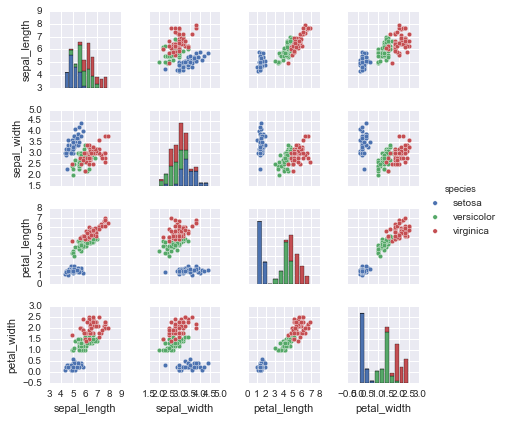

In [11]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [12]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [13]:
y_iris = iris['species']
y_iris.shape

(150,)

(10, -2)

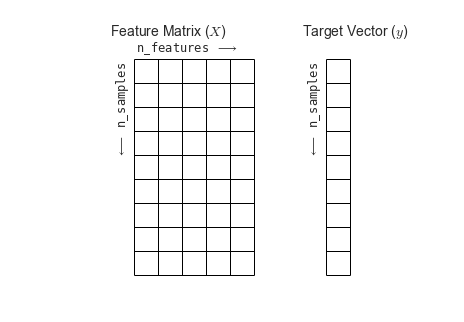

In [18]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)



## Supervised Learning Example : Simple Linear Regression



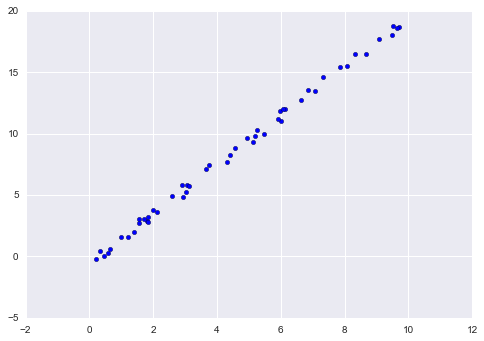

In [21]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)

plt.scatter(x, y)

1. Choose a class of Model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a similar linear repgression model, we can import the linear regression class.

In [24]:

from sklearn.linear_model import LinearRegression


There are other linear regression methods that can be used and they can be found [here](http://scikit-learn.org/stable/modules/linear_model.html)

2. Choose Model Hyperparameters

An important point is that a class of model is not the same as an instance of a model

- Would we like to fit for the offse (i.e, y-intercept)
- Would we like the model to be normalized ?
- Would we like to preprocess our features to add model flexibility?
- What degree of regulatarization would we like to use in our model?
- How many model components would we like to use?



In [26]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

3. Arrange data into a features matrix and target vector

We require a two-dimensional features matrix and a one-dimensinol target array.

Our tagert variable is *y*, which is in correct form (a length-n_samples array).

We need to massage the data *x* to make it a matrix of size [n_samples, n_features]

In this case, we need to reshape them into a one-dimensional array


In [37]:
X = x[:, np.newaxis]
x[:5]

array([ 3.74540119,  9.50714306,  7.31993942,  5.98658484,  1.5601864 ])

In [35]:
print (x.shape)
print (X.shape)

(50,)
(50, 1)


KNOW THE DIFFERENCE!

4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model

In [39]:
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [40]:
model.coef_

array([ 2.00660766])

In [42]:
model.intercept_

-0.53502757508000265

These two parameters represent the slop and intercept of the simple lienar fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters. In general, scikit_learn does not provide tools to draw conclusions from internal model parameters themselves: Interpreting model parameters is much more a **statistical modeling** question than a **Machine Learning** question. Machine learning rather focuses on what the model *predicts* if you would like to dive into the meaning of fit parameters within the mode, other tools are available [here](http://statsmodels.sourceforge.net/)

In [44]:
xfit = np.linspace(-1, 11)


As vefore, we need to coerce these x values into a [n_sample, n_features] features matrix, after which we can feed it to the model.

In [45]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

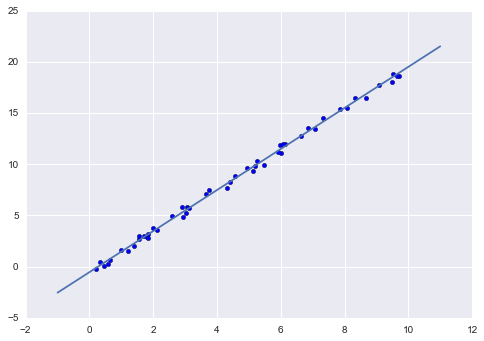

In [46]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example.

## Supervised learning example: Iris Classification

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see In Depth: [Naive Bayes Classification](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb) for more details). Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [48]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                               random_state=1)

Data is now arranged, we can continue

In [49]:
from sklearn.naive_bayes import GaussianNB # 1. Choose model class
model = GaussianNB()                       # 2. Instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict new data

Lastly, we can use the accuracy_score utility to see the fraction of the predicted labels that math their true value.

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

our accuracy is 97% we that that the naive classification algorithm is very effective for this task.

What would be a better type of algorithm for this type of task?

## Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see In Depth: [Principal Component Analysis](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [51]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2)           # 2. Instantiate the model with hyperparameter '2'
model.fit(X_iris)                     # 3. Fit to data. Notice y is not specifed
X_2D = model.transform(X_iris)        # 4. Transform the data to two dimensions


Now let's plot the results. A quick way to do this is to insert the results into the original iris DataFrame, and use *Seaborn'S* **lmplot** to show the results 

lmplot = Linear Models Plot

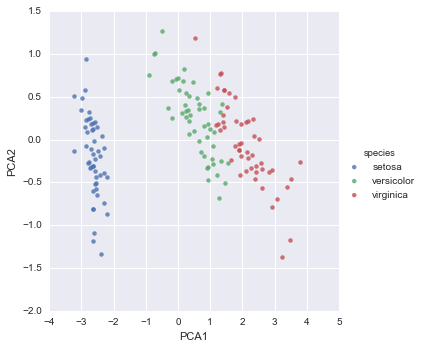

In [54]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## Unsupervised learning: Iris clustering
Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a [Gaussian mixture model](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb) (GMM), discussed in more detail in In Depth: Gaussian Mixture Models. A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [59]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters 
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine Cluster labels

As before, we will add the cluster label to the iris DataFrame and use Seaborn to plot the results:

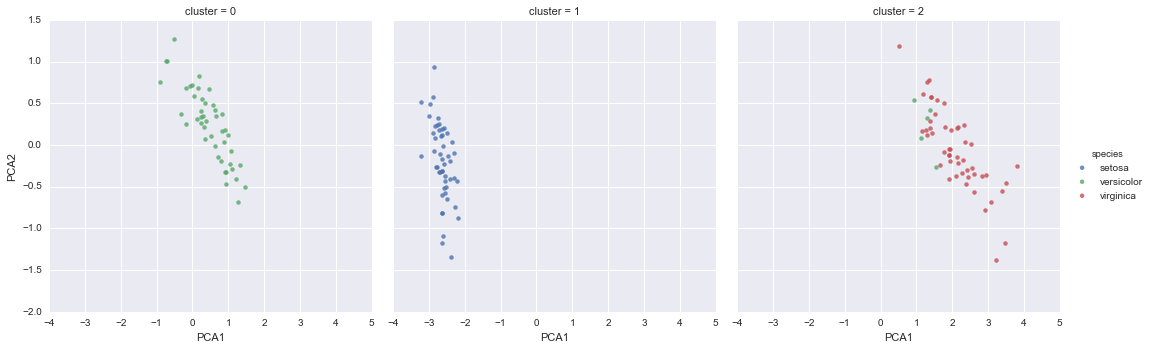

In [60]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
            col='cluster', fit_reg=False)